# Mandelbrot Set

In [3]:
%matplotlib inline
from graphics import *
from nld_graphics import *
import numpy as np
import time as time
import matplotlib.pyplot as plt

In [4]:
class MandelbrotSet:

    def __init__ (self, pixelWidth, pixelHeight):
        self.window = NLDGraphWin("Complex Plane", pixelWidth, pixelHeight, [-2,-2,2,2])
        self.window.close() #So I can test Matplot without graphics constantly open
        #May be useful later so I'm leaving it in
        self.yPoints = np.linspace(-1.4, 1.4, self.window.height)
        self.xPoints = np.linspace(-2.1, 0.8, self.window.width)

    #Generates the number of iterates each point takes to diverge
    def numPlotSet(self, maxIterates=100):

        y, x = np.ogrid[-1.4:1.4:self.window.height*1j, -2.1:0.8:self.window.width*1j]
        c = x + y*1j
        z = c
        divergeIter = maxIterates + np.zeros(z.shape, dtype=int)

        for i in range(maxIterates):
            z = z**2 + c
            diverge = abs(z) > 2
            divergingNow = diverge & (divergeIter == maxIterates)
            divergeIter[divergingNow] = i
            z[diverge] = 2

        return divergeIter

    #Generates which points diverge
    def regPlotSet(self, maxIterates=100):
        y, x = np.ogrid[-1.4:1.4:self.window.height*1j, -2.1:0.8:self.window.width*1j]
        c = x + y*1j
        z = c
        
        for i in range(maxIterates):
            z = z**2 + c
            diverge = abs(z) > 2
            z[diverge] = 2
            
        return diverge

## Mandelbrot set with a Matplotlib plot

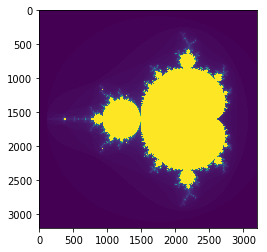

In [6]:
m = MandelbrotSet(3200, 3200)
numoutput = m.numPlotSet()
plt.imshow(numoutput); #TODO: Add color scheme

## Mandelbrot set with a graphwin